<a href="https://colab.research.google.com/github/francianerod/PROJETOS-SoulCode/blob/main/Projeto_Looker_Atendimento_09_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solicitação**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD1

Data de entrega: 09 de abril de 2023

Professor: Igor Gondim

Alunos: Franciane Rodrigues

Colaboração deste código e agradecimentos para: Guilherme Lins e Karen Almeida

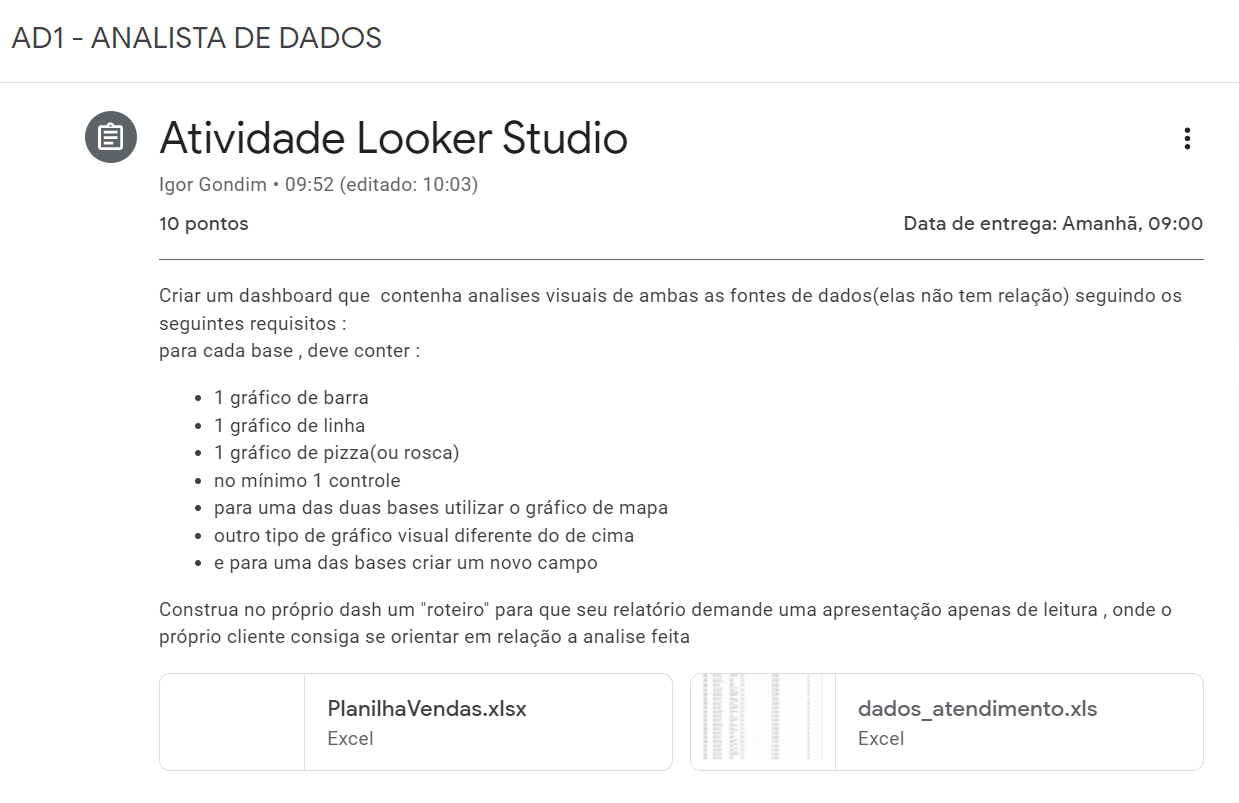

## **Instalação de bibliotecas e importação de módulos**

In [ ]:
# instalação de pacote
#!pip install gcsfs

In [ ]:
# Impotação de módulos
import pandas as pd
import numpy as np
import os
from google.cloud import storage

## **Conector para Cloud Storage(bucket)**

In [ ]:
# Configuração da chave de segurança para acesso ao bucket
serviceAccount = '/content/effective-pipe-377819-3488414144c9.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Informações do arquivo do bucket a ser utilizado
# caminho do bucket: francianerodrigues01/brutos/PlanilhaVendas.xlsx
client = storage.Client()
bucket = client.get_bucket('francianerodrigues01')
bucket.blob('dados_atendimento.xlsx')
path = 'gs://francianerodrigues01/brutos/dados_atendimento.xlsx'

## **Extração**

In [ ]:
# Extração da base de dados e guardar o backup da base de dados original como segurança
df = pd.read_excel(path)
dfback = df.copy()

## **Pré-Análise**

In [ ]:
# Mostrar a base de dados
df

,Call Id,Data,Atendente,Área,Respondido - Resolvido (S/N),Velocidade de Resposta,Duracao Chamada,Duracao com atendente em Segundos,Índice de Satisfacao
0,ID0001,43912,João D.,Vendas,Sim - S,109,00:02:23,143,2
1,ID0002,43907,Marcelo F.,RECLAMAÇÕES,Sim - N,70,00:04:02,242,3
2,ID0003,43908,Leandro C.,Vendas,Sim - S,10,00:02:11,131,3
3,ID0004,43899,Leandro C.,Vendas,Sim - S,53,00:00:37,37,2
4,ID0007,43891,Marina Z.,Cancelametos,Sim - S,24,00:03:40,220,2
...,...,...,...,...,...,...,...,...,...
1004,ID1764,43896,Ana S.,Vendas,Sim - S,92,00:06:00,360,4
1005,ID1765,43895,Ana S.,Vendas,Sim - S,95,00:05:00,300,3
1006,ID1766,43910,Gustavo M.,Vendas,Sim - S,49,00:01:58,118,5
1007,ID1770,43894,Ana S.,Cancelametos,Sim - S,78,00:01:02,62,4


In [ ]:
# Mostrando atendentes
sorted(pd.unique(df['Atendente']))

['Ana S.',
 'Gustavo M.',
 'João D.',
 'Leandro C.',
 'Marcelo F.',
 'Marina Z.',
 'Paulo G.']

In [ ]:
# Mostrando as áreas
sorted(pd.unique(df['Área']))

['Cancelametos', 'RECLAMAÇÕES', 'Trocas', 'Vendas']

In [ ]:
# Verificação de dados ausentes
df.isna().sum()

Call Id                              0
Data                                 0
Atendente                            0
Área                                 0
Respondido - Resolvido (S/N)         0
Velocidade de Resposta               0
Duracao Chamada                      0
Duracao com atendente em Segundos    0
Índice de Satisfacao                 0
dtype: int64

## **Transformação**

In [ ]:
# Correções de informações
df.loc[df['Área'] == 'Cancelametos', 'Área'] = 'Cancelamentos'
df.loc[df['Área'] == 'RECLAMAÇÕES', 'Área'] = 'Reclamações'

In [ ]:
# Tratando a coluna: Respondido - Resolvido (S/N)
df['Resolvido'] = df.loc[df['Respondido - Resolvido (S/N)'] == 'Sim - S','Resolvido'] = 'S'
df.loc[df['Respondido - Resolvido (S/N)']=='Sim - N','Resolvido'] = 'N'

In [ ]:
# Mudando o nome da coluna
df.rename(columns={'Respondido - Resolvido (S/N)': 'Respondido'}, inplace=True)

In [ ]:
# Modificações na coluna "respondido"
df.loc[df['Respondido']=='Sim - S','Respondido'] = 'Sim'
df.loc[df['Respondido']=='Sim - N','Respondido'] = 'Sim'
df.loc[df['Respondido']=='Não - N','Respondido'] = 'Não'

In [ ]:
# Converte a coluna de data serial em um objeto DateTime
df['Data'] = pd.to_datetime(df['Data'], unit='D', origin='1899-12-30')

In [ ]:
# Formata a data no estilo 'dia/mês/ano'
#df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df['Data'] = df['Data'].dt.strftime('%m/%d/%Y')

In [ ]:
# Verificação de datas
sorted(pd.unique(df['Data']))

['03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/2020',
 '03/29/2020',
 '03/30/2020',
 '03/31/2020']

In [ ]:
# Mudança no tipo de dado
df['Duracao Chamada'] = pd.to_datetime(df['Duracao Chamada'])

In [ ]:
# Renomeação de colunas
df.rename(columns={'Call Id': 'id',
                   'Velocidade de Resposta': 'veloc_resp',
                   'Duracao Chamada': 'duracao_chamada',
                   'Duracao com atendente em Segundos': 'duracao_atend_seg',
                   'Índice de Satisfacao': 'satisfacao'
                   },
                   inplace = True)

In [ ]:
# Separando o tempo de duração da chamada
df['duracao_chamada_of'] = df['duracao_chamada'].dt.strftime('%H:%M:%S')

In [ ]:
# Mostrando tabela final
df

,id,Data,Atendente,Área,Respondido,veloc_resp,duracao_chamada,duracao_atend_seg,satisfacao,Resolvido,duracao_chamada_of
0,ID0001,03/22/2020,João D.,Vendas,Sim,109,2023-04-08 00:02:23,143,2,S,00:02:23
1,ID0002,03/17/2020,Marcelo F.,Reclamações,Sim,70,2023-04-08 00:04:02,242,3,N,00:04:02
2,ID0003,03/18/2020,Leandro C.,Vendas,Sim,10,2023-04-08 00:02:11,131,3,S,00:02:11
3,ID0004,03/09/2020,Leandro C.,Vendas,Sim,53,2023-04-08 00:00:37,37,2,S,00:00:37
4,ID0007,03/01/2020,Marina Z.,Cancelamentos,Sim,24,2023-04-08 00:03:40,220,2,S,00:03:40
...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,03/06/2020,Ana S.,Vendas,Sim,92,2023-04-08 00:06:00,360,4,S,00:06:00
1005,ID1765,03/05/2020,Ana S.,Vendas,Sim,95,2023-04-08 00:05:00,300,3,S,00:05:00
1006,ID1766,03/20/2020,Gustavo M.,Vendas,Sim,49,2023-04-08 00:01:58,118,5,S,00:01:58
1007,ID1770,03/04/2020,Ana S.,Cancelamentos,Sim,78,2023-04-08 00:01:02,62,4,S,00:01:02


In [ ]:
# Para testes
df_teste = df.copy()

## **Carregamento**

In [ ]:
# salva no bucket
df.to_csv('gs://francianerodrigues01/tratados/atendimento_tratado.csv', index=False) 

## **Análises e Dashboard feito no Looker Studio**

In [ ]:
# Notas médias de satisfação por atendência
df.groupby(['Atendente'])['satisfacao'].mean().sort_values(ascending=False)

Atendente
Marina Z.     3.601351
Paulo G.      3.597315
Marcelo F.    3.591304
Gustavo M.    3.591241
Leandro C.    3.431373
Ana S.        3.323529
João D.       2.818713
Name: satisfacao, dtype: float64

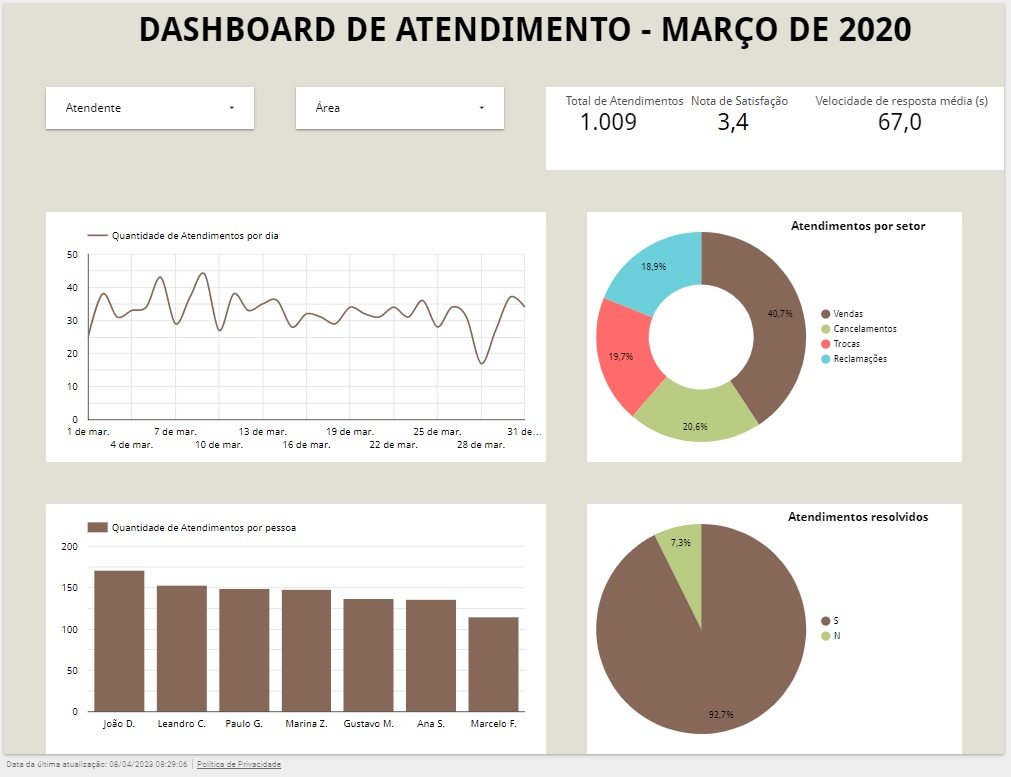

## **Conclusões**


*   1) Foram 1009 atendimentos foram realizados no mês de março de 2020
*   2) A nota de satisfação do atendimento foi de 3,4.
*   3) Velocidade de resposta média é de 67 segundos, o equivalente a 1 minuto e 7 segundos.
*   4) A maior quantidade de atendimentos ocorreu no dia 09 de março de 2020 com total de 44 atendimentos enquanto que no dia 28 de março de 2020 o número foi de 17 atendimentos. 
*   5) Cerca de 81% dos atendimentos se concentram em Vendas, Cancelamentos e troca.

*   6) João é o que mais realizou atendimentos nesse mês, entretanto tem a pior nota de satisfação (2.8).
*   7) Cerca de 92% dos atendimentos realizados são resolvidos. 